# Summary of DAS

This notebook contains a list of Python methods that were introduced in the DAS programming exercises.

### Import the libraries

In [1]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

# next command ensures that plots appear inside the notebook
%matplotlib inline
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # for linear regression
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
import statsmodels.api as sm

# <span class="section">1.</span> Hypothesis testing for equality of means

In [3]:
df_michelson = pd.read_csv("../datasets/light_michelson.csv")
df_michelson.head()

,Speed [km/s]
0,299942
1,299832
2,299992
3,300162
4,300022


In [4]:
df_newcomb = pd.read_csv("../datasets/light_newcomb.csv")
df_newcomb.head()

,Speed [km/s]
0,299730.154255
1,299814.680525
2,299790.525298
3,299826.759599
4,299778.449144


## Step 1: Define quantitative question


## Step 2: Formulate hypothesis


## Step 3: Check assumptions


### Kernel density plot

In [5]:
plt.rcParams['figure.figsize'] = 8, 8  # square plots

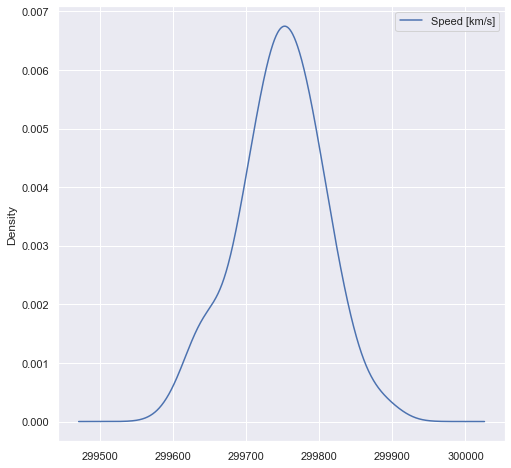

In [6]:
df_newcomb.plot(kind='density');

### Q-Q plot


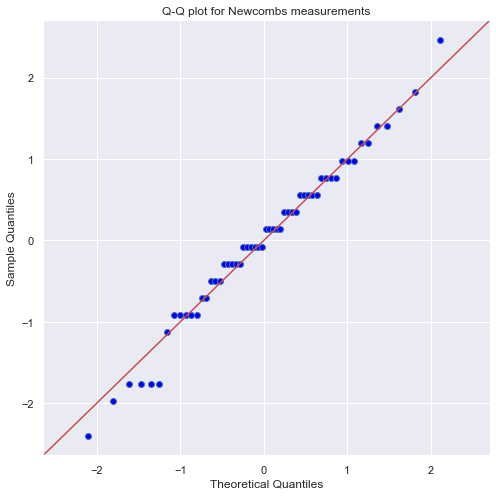

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, squeeze=False)
sm.qqplot(df_newcomb['Speed [km/s]'], fit=True, line='45', ax=ax[0,0])
ax[0,0].set_title('Q-Q plot for Newcombs measurements');

### Anderson-Darling normality test


In [8]:
sm.stats.normal_ad(df_newcomb['Speed [km/s]'])

(0.33500708086568665, 0.5017926373917099)

## Step 4: Apply appropriate test

### One sample

In [9]:
d_newcomb = sm.stats.DescrStatsW(df_newcomb['Speed [km/s]'])

In [10]:
d_newcomb.ttest_mean(299792.458, alternative='two-sided')

(-5.957593962870322, 1.8835359208278103e-07, 55.0)

In [11]:
d_newcomb.tconfint_mean(alpha=0.05, alternative='two-sided')

(299731.10613570415, 299761.9922101517)

### Two sample

In [12]:
d_newcomb = sm.stats.DescrStatsW(df_newcomb['Speed [km/s]'])
d_michelson = sm.stats.DescrStatsW(df_michelson['Speed [km/s]'])

In [13]:
cm = sm.stats.CompareMeans(d_newcomb, d_michelson)

In [14]:
cm.ttest_ind(alternative='two-sided')

(-16.437497750224615, 1.0487810072421076e-35, 154.0)

In [15]:
cm.tconfint_diff(alpha=0.05, alternative='two-sided')

(-221.6288954940909, -174.07275865012264)

## Step 5: Decision


# <span class="section">2.</span> Hypothesis testing on proportions

In [16]:
students = 100
passes = 88

students_previous = 89
passes_previous = 70

## Step 1: Define quantitative question


## Step 2: Formulate hypothesis


## Step 3: Check assumptions


## Step 4: Apply appropriate test

In [17]:
ztest_exam = sm.stats.proportions_ztest([passes, passes_previous], [students, students_previous], alternative='larger')
ztest_exam

(1.7324066201653368, 0.041600595056627936)

In [18]:
ztest_exam[1]

0.041600595056627936

## Step 5: Decision


# <span class="section">3.</span> Performing diagnostics on regression results

In [19]:
df_forbes= pd.read_csv("../datasets/water.csv")

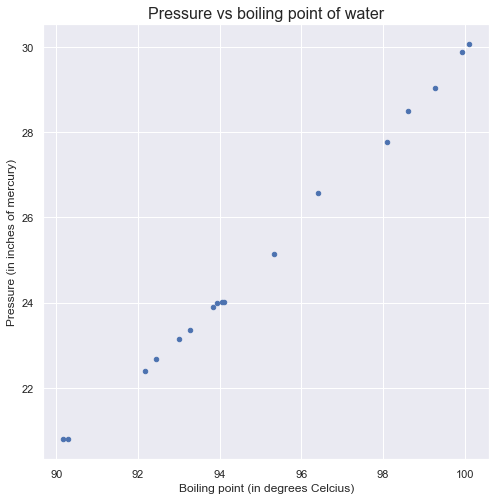

In [20]:
ax = df_forbes.plot(kind='scatter', x='bp', y='pres', c='b')
ax.set_xlabel('Boiling point (in degrees Celcius)')
ax.set_ylabel('Pressure (in inches of mercury)')
ax.set_title("Pressure vs boiling point of water", fontsize=16);

In [21]:
X = df_forbes[['bp']]
y = df_forbes['pres']
linear_model = LinearRegression()
linear_model.fit(X, y);

c:\Users\mail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


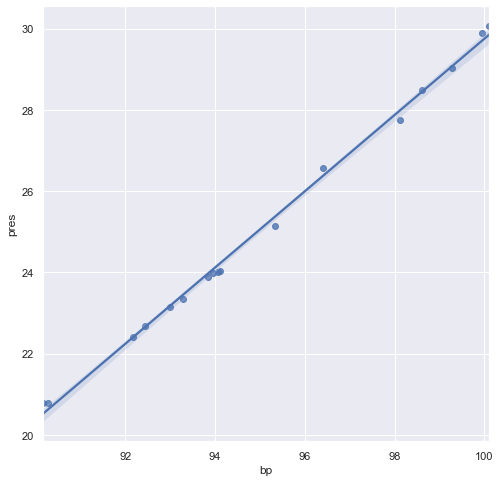

In [22]:
sns.regplot(df_forbes['bp'], df_forbes['pres']);

#### Model evaluation


In [23]:
linear_model.score(X, y)

0.9972253366738393

In [24]:
y_pred = linear_model.predict(X)
residuals = (y - y_pred)

In [25]:
from sklearn.preprocessing import scale

residuals_norm = scale(residuals)

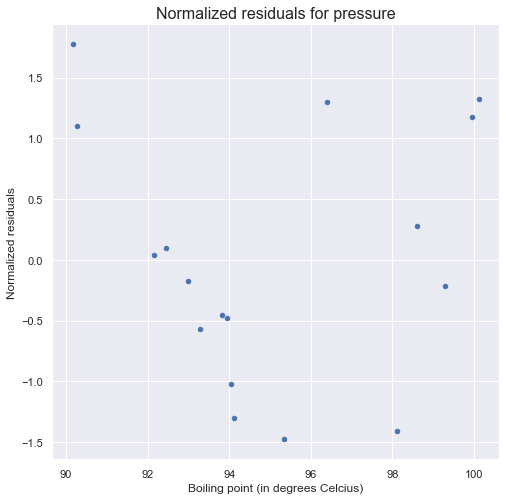

In [26]:
df_forbes_vis = df_forbes.copy()
df_forbes_vis['residuals'] = residuals_norm

ax = df_forbes_vis.plot(kind='scatter', x='bp', y='residuals', c='b')
ax.set_xlabel('Boiling point (in degrees Celcius)')
ax.set_ylabel('Normalized residuals')
ax.set_title('Normalized residuals for pressure', fontsize=16);

In [27]:
y_log = np.log(df_forbes['pres'])
linear_model_log = LinearRegression()
linear_model_log.fit(X, y_log);

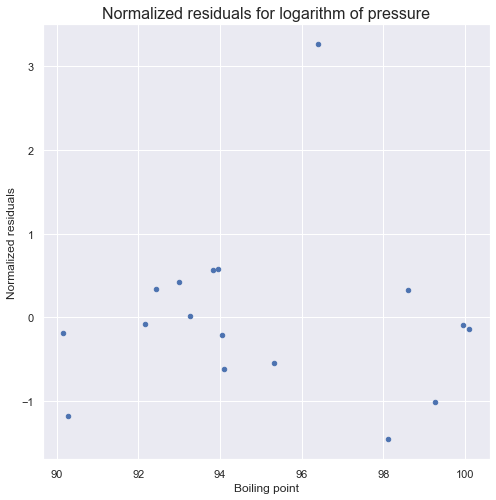

In [28]:
y_log_pred = linear_model_log.predict(X)
residual_log = scale(y_log - y_log_pred)

df_forbes_log_vis = df_forbes.copy()
df_forbes_log_vis['residuals'] = residual_log

ax = df_forbes_log_vis.plot(kind='scatter', x='bp', y='residuals', c='b')
ax.set_xlabel('Boiling point')
ax.set_ylabel('Normalized residuals')
ax.set_title('Normalized residuals for logarithm of pressure', fontsize=16);